**KNN Classification Model for Biomechanical Features Classification of Patients**

KNN = K Neirest Neighbour

Steps of KNN algorithm:
1. Chosing a k value.
2. Finding the k value of nearest neighbors to our data point (which we want to predict) 
3. In what classes do these neighbors belong to? 
4. Predict our data point according to dominance of the neighbor classification.

Euclidean principle is used to find nearest neighbors:
euclidean distance = square root((x2-x1)ˆ2 + (y2-y1)ˆ2)

The most important progress in KNN is normalization of the values (Other wise big difference between the data points' x and y values can not be seen easly).

In order to use sklearn library for KNN we can follow these steps:
1. Import libraries
2. Import dataset
3. Clean and fill dataset
4. Visualize dataset
5. Change the classification to binary form (0 or 1)
6. Exlude y values from the dataset
7. Implement normalization
8. Split the dataset to train and test
9. Train the model
10. Predict the x_test
11. Analyse the score of our prediction
12. Investigate to find the best k value possible

**1. Importing Libraries:**

In [252]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


**2. Importing Dataset:**

In [253]:
data = pd.read_csv('../input/column_2C_weka.csv')
data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,Abnormal
101,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,Abnormal
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,Abnormal
18,38.697912,13.444749,31.000000,25.253163,123.159251,1.429186,Abnormal
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Abnormal


**3. Cleaning and Filling Dataset:**

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


We don't have any NaN values. So we don't need to clean or fill the dataset.

**4. Visualizing Dataset:**

In [255]:
# Investigate the correlation between the features:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


From the correlation one can see easyly pelvic_incidence and lumbar_lordosis_angel features are highly correlated (0.71).

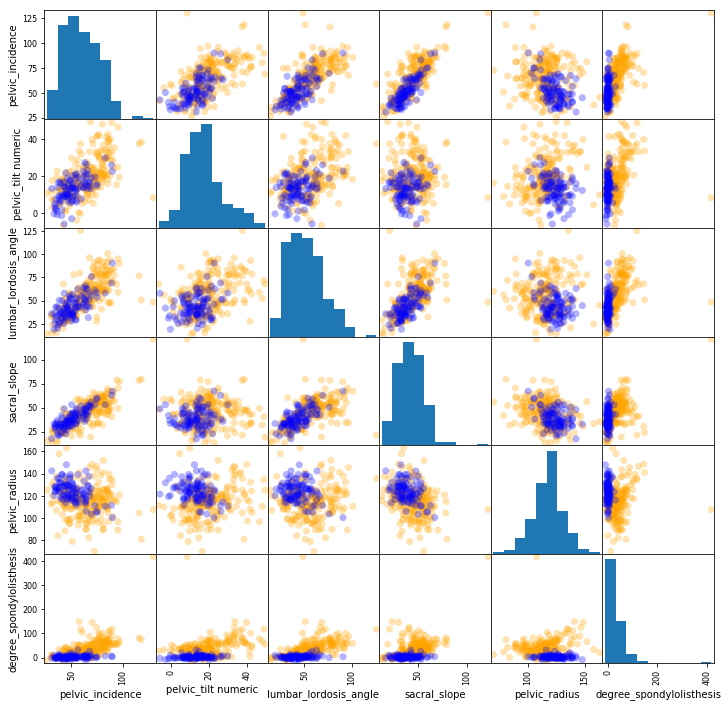

In [256]:
# Visulization of the features:
color_list = ['orange' if i=='Abnormal' else 'blue' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'], c=color_list, figsize= [12,12], diagonal='hist', alpha=0.3, s = 200, marker = '.')
plt.show()

**5. Changing Classes to Binary Form:**

In [258]:
# Change classes to Abnormal = 1, Normal = 0:
data['class'] = [1 if each == 'Abnormal' else 0 for each in data['class']]
data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561,1
94,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,1
48,40.557357,17.977784,34.000000,22.579573,121.046246,-1.537383,1
146,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,1
191,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,1


**6. Exclude y Values from Dataset**

In [259]:
y = data['class'].values
x_data = data.drop(['class'], axis=1)

**7. Implementing Normalization**

In [260]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


**8. Splitting Dataset into Train and Test**

In [276]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [277]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (217, 6)
y_train shape:  (217,)
x_test shape:  (93, 6)
y_test shape:  (93,)


**9. Training KNN Model**

In [278]:
from sklearn.neighbors import KNeighborsClassifier

# Creating model with the k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

**10. Predicting the x_test values**

In [312]:
# Predicting our y values using our KNN model and x_test:
prediction = knn.predict(x_test)

# Comparing y_prediction and y_test values:
datashow = {'y_prediction': prediction, 'y_test': y_test}
d_new = pd.DataFrame(datashow)
d_new.T   # For the ease of reading I implemented transpose of our dataset.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
y_prediction,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1
y_test,1,0,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1


**11. Analysing the Score of the Prediction**

In [313]:
print('Score of the model for k=3: ', knn.score(x_test, y_test))

Score of the model for k=3:  0.7526881720430108


So we can see our model's accuracy is not great. Let's see if there are any possibility for a better model.

**12. Investigating the Best k Value:**

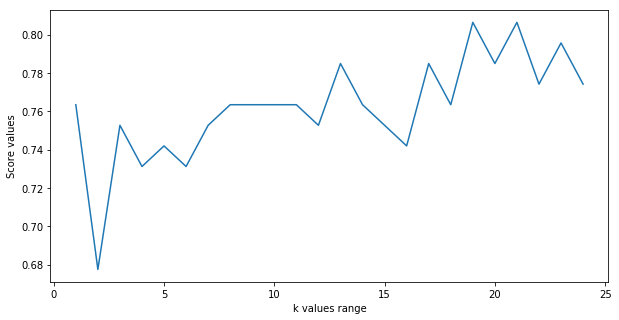

In [314]:
score_list=[]
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2 = knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,25), score_list)
plt.xlabel('k values range')
plt.ylabel('Score values')
plt.show()

From the graph above we can see the best value for k is around 18-21.

**13. Final model with the best k value:**

In [315]:
# Retraining and predicting our dataset with the best k value (k=19):
knn3 = KNeighborsClassifier(n_neighbors=19)
knn3.fit(x_train,y_train)
y_prediction = knn3.predict(x_test)
print('Score of the model for k=19: ', knn3.score(x_test, y_test))

Score of the model for k=19:  0.8064516129032258


With the help of a better k value our model's accuracy is raised from 75% to 80%.

**14. Comparing Test and Prediction Values:**

In [318]:
d = {'y_prediction': y_prediction, 'y_test': y_test}
data01 = pd.DataFrame(data=d)
data01.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
y_prediction,1,1,1,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,1,0,1
y_test,1,0,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1


Let's count how many of our predictions are correct and how many of them are false.

In [320]:
correct = 0
false = 0
for each in range(1,len(data01)):
    if data01.y_test[each] == data01.y_prediction[each]:
        correct = correct + 1
    else:
        false = false + 1

print('correct predictions = ', correct)
print('false predictions = ', false)

correct predictions =  74
false predictions =  18
